# ***Creating an LSTM model to predict gas price***
**Name:**Rania Kacem

# Importing libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
import sklearn

#Dataset Loading

In [ ]:
df_info = pd.read_csv('DATTAA.csv')

<ipython-input-20-c7ad1bace98e>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_info = pd.read_csv('DATTAA.csv')


# Explaoratory Data Analysis

In [ ]:
df_info.head()

current_datetime  current_block_number  gas_price_Gwei  safe_gas_price  \
0  2023-03-14 08:20:09              16824958            16.0              16   
1  2023-03-14 08:20:15              16824959            17.0              18   
2  2023-03-14 08:20:29              16824960            17.0              18   
3  2023-03-14 08:20:41              16824961            16.0              17   
4  2023-03-14 08:20:54              16824962            17.0              18   

   ProposeGasPrice  fast_gas_price  priority_safe  priority_propose  \
0               16              16            1.0               1.0   
1               18              20            1.0               1.0   
2               18              20            1.0               1.0   
3               17              18            1.0               1.0   
4               18              19            1.0               1.0   

   priority_fast  BaseFee  transactions_nbr:  blockreward_ETH;  trnx_fees;  \
0            1.0     15.0                122          0.041170    0.218501   
1            3.0     17.0                107          0.019816    0.213060   
2            3.0     17.0                141          0.023019    0.349429   
3            2.0     16.0                 91          0.009815    0.160773   
4            2.0     17.0                143          0.021041    0.239748   

   burnet_fees; blocksize_bytes; blockgasused: block_base_fee_per_gas_ETH:  \
0      0.177331           43,336     9,892,068                         0.0   
1      0.193244          102,921    11,258,990                         0.0   
2      0.326410          120,213    19,629,558                         0.0   
3      0.150958           52,855     8,741,076                         0.0   
4      0.218707           55,550    13,360,853                         0.0   

   trx_throughput_TPS:  
0                 12.0  
1                 12.0  
2                 12.0  
3                 12.0  
4                 12.0

In [ ]:
df_info.shape

(103366, 18)

In [ ]:
df_info.info

<bound method DataFrame.info of            current_datetime  current_block_number  gas_price_Gwei  \
0       2023-03-14 08:20:09              16824958       16.000000   
1       2023-03-14 08:20:15              16824959       17.000000   
2       2023-03-14 08:20:29              16824960       17.000000   
3       2023-03-14 08:20:41              16824961       16.000000   
4       2023-03-14 08:20:54              16824962       17.000000   
...                     ...                   ...             ...   
103361  2023-04-05 11:41:49              16982349       29.156160   
103362  2023-04-05 11:42:04              16982350       29.128078   
103363  2023-04-05 11:42:11              16982351       28.915457   
103364  2023-04-05 11:42:26              16982352       29.158122   
103365  2023-04-05 11:42:33              16982353       29.158122   

        safe_gas_price  ProposeGasPrice  fast_gas_price  priority_safe  \
0                   16               16              16       1.0

**NUMERIC DATA STATS**

In [ ]:
df_info.describe()

current_block_number  gas_price_Gwei  safe_gas_price  ProposeGasPrice  \
count          1.033660e+05   103366.000000   103366.000000    103366.000000   
mean           1.690349e+07       23.622462       24.076524        24.242623   
std            4.621939e+04       10.537691       10.440821        12.660117   
min            1.682496e+07        9.486396       10.000000        10.000000   
25%            1.686105e+07       16.598986       17.000000        17.000000   
50%            1.690248e+07       21.000000       21.000000        22.000000   
75%            1.694848e+07       27.670090       28.000000        28.000000   
max            1.698235e+07      178.286933      138.000000       935.000000   

       fast_gas_price  priority_safe  priority_propose  priority_fast  \
count   103366.000000  103366.000000     103366.000000  103366.000000   
mean        26.076205       0.554542          0.720641       2.554223   
std         13.593418       0.313588          6.682028       7.874627   
min         10.000000       0.000010          0.000010       0.000010   
25%         19.000000       0.281006          0.335736       1.607322   
50%         23.000000       0.561168          0.631531       2.533241   
75%         30.000000       0.840998          0.921543       3.213755   
max        938.000000       2.000000        887.875105     890.875105   

             BaseFee  transactions_nbr:  blockreward_ETH;     trnx_fees;  \
count  103366.000000      103366.000000     103366.000000  103366.000000   
mean       23.521982         150.836977          0.065342       0.419409   
std        10.431698          54.604912          0.321230       0.404030   
min         9.448525           0.000000          0.000000       0.000000   
25%        16.492483         122.000000          0.019236       0.255792   
50%        20.936857         142.000000          0.031061       0.355423   
75%        27.558049         167.000000          0.057537       0.498642   
max       137.000000        1183.000000         36.756177      37.354673   

        burnet_fees;  trx_throughput_TPS:  
count  103366.000000        103366.000000  
mean        0.354067            12.397153  
std         0.201644             0.939939  
min         0.000000             9.900000  
25%         0.222999            11.800000  
50%         0.308568            12.500000  
75%         0.432039            13.100000  
max         3.728918            15.100000

In [ ]:
df_info.columns


Index(['current_datetime', 'current_block_number', 'gas_price_Gwei',
       'safe_gas_price', 'ProposeGasPrice', 'fast_gas_price', 'priority_safe',
       'priority_propose', 'priority_fast', 'BaseFee', 'transactions_nbr:',
       'blockreward_ETH;', 'trnx_fees;', 'burnet_fees;', 'blocksize_bytes;',
       'blockgasused:', 'block_base_fee_per_gas_ETH:', 'trx_throughput_TPS:'],
      dtype='object')

In [ ]:
df_info.isnull().sum()

current_datetime               0
current_block_number           0
gas_price_Gwei                 0
safe_gas_price                 0
ProposeGasPrice                0
fast_gas_price                 0
priority_safe                  0
priority_propose               0
priority_fast                  0
BaseFee                        0
transactions_nbr:              0
blockreward_ETH;               0
trnx_fees;                     0
burnet_fees;                   0
blocksize_bytes;               0
blockgasused:                  0
block_base_fee_per_gas_ETH:    0
trx_throughput_TPS:            0
dtype: int64

In [ ]:
df_info.dtypes

current_datetime                object
current_block_number             int64
gas_price_Gwei                 float64
safe_gas_price                   int64
ProposeGasPrice                  int64
fast_gas_price                   int64
priority_safe                  float64
priority_propose               float64
priority_fast                  float64
BaseFee                        float64
transactions_nbr:                int64
blockreward_ETH;               float64
trnx_fees;                     float64
burnet_fees;                   float64
blocksize_bytes;                object
blockgasused:                   object
block_base_fee_per_gas_ETH:     object
trx_throughput_TPS:            float64
dtype: object

In [ ]:
df_info.duplicated().sum()


0

In [ ]:
df_info['current_block_number'].value_counts()

16824958    1
16924534    1
16924544    1
16924543    1
16924542    1
           ..
16876331    1
16876330    1
16876329    1
16876328    1
16982353    1
Name: current_block_number, Length: 103366, dtype: int64

In [ ]:
## Correlation
df_info.corr() 

<ipython-input-30-fa945f3620d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_info.corr()


current_block_number  gas_price_Gwei  safe_gas_price  \
current_block_number              1.000000        0.159963        0.154521   
gas_price_Gwei                    0.159963        1.000000        0.994984   
safe_gas_price                    0.154521        0.994984        1.000000   
ProposeGasPrice                   0.128486        0.851614        0.850082   
fast_gas_price                    0.120093        0.820674        0.816873   
priority_safe                    -0.241582        0.015205        0.044097   
priority_propose                 -0.009343        0.059541        0.050156   
priority_fast                    -0.007189        0.098047        0.085986   
BaseFee                           0.161918        0.995397        0.999549   
transactions_nbr:                 0.002362        0.093144        0.091677   
blockreward_ETH;                 -0.014491        0.068867        0.069622   
trnx_fees;                        0.047686        0.424399        0.426260   
burnet_fees;                      0.118633        0.740650        0.743176   
trx_throughput_TPS:               0.077473        0.516701        0.520321   

                      ProposeGasPrice  fast_gas_price  priority_safe  \
current_block_number         0.128486        0.120093      -0.241582   
gas_price_Gwei               0.851614        0.820674       0.015205   
safe_gas_price               0.850082        0.816873       0.044097   
ProposeGasPrice              1.000000        0.975370       0.035473   
fast_gas_price               0.975370        1.000000       0.032879   
priority_safe                0.035473        0.032879       1.000000   
priority_propose             0.568045        0.573146       0.045235   
priority_fast                0.558018        0.644462       0.038111   
BaseFee                      0.849759        0.816599       0.014075   
transactions_nbr:            0.097751        0.096777      -0.001577   
blockreward_ETH;             0.269735        0.278750       0.013889   
trnx_fees;                   0.541205        0.536101       0.020607   
burnet_fees;                 0.654698        0.630108       0.019164   
trx_throughput_TPS:          0.430773        0.417458      -0.042855   

                      priority_propose  priority_fast   BaseFee  \
current_block_number         -0.009343      -0.007189  0.161918   
gas_price_Gwei                0.059541       0.098047  0.995397   
safe_gas_price                0.050156       0.085986  0.999549   
ProposeGasPrice               0.568045       0.558018  0.849759   
fast_gas_price                0.573146       0.644462  0.816599   
priority_safe                 0.045235       0.038111  0.014075   
priority_propose              1.000000       0.924683  0.048840   
priority_fast                 0.924683       1.000000  0.084916   
BaseFee                       0.048840       0.084916  1.000000   
transactions_nbr:             0.041882       0.045444  0.091805   
blockreward_ETH;              0.402920       0.389430  0.069265   
trnx_fees;                    0.360321       0.361083  0.426014   
burnet_fees;                  0.080094       0.103112  0.743250   
trx_throughput_TPS:           0.001140       0.029037  0.522065   

                      transactions_nbr:  blockreward_ETH;  trnx_fees;  \
current_block_number           0.002362         -0.014491    0.047686   
gas_price_Gwei                 0.093144          0.068867    0.424399   
safe_gas_price                 0.091677          0.069622    0.426260   
ProposeGasPrice                0.097751          0.269735    0.541205   
fast_gas_price                 0.096777          0.278750    0.536101   
priority_safe                 -0.001577          0.013889    0.020607   
priority_propose               0.041882          0.402920    0.360321   
priority_fast                  0.045444          0.389430    0.361083   
BaseFee                        0.091805          0.069265    0.426014   
transactions_nbr:              1.0

In [ ]:
a=len(df_info['current_block_number'].unique().tolist())
print(a)

103366


# Data Cleaning

In [ ]:
df_info['block_base_fee_per_gas_ETH:'][102523]=2.9542166e-08
df_info['block_base_fee_per_gas_ETH:'][102523]
df_info['block_base_fee_per_gas_ETH:']= df_info['block_base_fee_per_gas_ETH:'].astype(float)

<ipython-input-32-cccca3906503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['block_base_fee_per_gas_ETH:'][102523]=2.9542166e-08


In [ ]:
#modify types
df_info['blockgasused:'] = df_info['blockgasused:'].str.replace(',', '')
df_info['blockgasused:'] = df_info['blockgasused:'].astype(int)
df_info['blocksize_bytes;'] = df_info['blocksize_bytes;'].str.replace(',', '')
df_info['blocksize_bytes;'] = df_info['blocksize_bytes;'].astype(int)
df_info['current_datetime'] = pd.to_datetime(df_info['current_datetime'] , format='%Y/%m/%d %H:%M:%S')

In [ ]:
#defining the time as an index
df_info.index = pd.to_datetime(df_info['current_datetime'], format='%d.%m.%Y %H:%M:%S')


In [ ]:
df_info.dtypes

current_datetime               datetime64[ns]
current_block_number                    int64
gas_price_Gwei                        float64
safe_gas_price                          int64
ProposeGasPrice                         int64
fast_gas_price                          int64
priority_safe                         float64
priority_propose                      float64
priority_fast                         float64
BaseFee                               float64
transactions_nbr:                       int64
blockreward_ETH;                      float64
trnx_fees;                            float64
burnet_fees;                          float64
blocksize_bytes;                        int64
blockgasused:                           int64
block_base_fee_per_gas_ETH:           float64
trx_throughput_TPS:                   float64
dtype: object

In [ ]:
df_info.drop('current_datetime', axis=1, inplace=True)
df_info.drop('current_block_number', axis=1, inplace=True)

# Data visualisation

In [ ]:
# plt.figure(figsize=(16, 13), dpi=100)
# features = ['gas_price_Gwei',
#        'safe_gas_price', 'ProposeGasPrice', 'fast_gas_price', 'priority_safe',
#        'priority_propose', 'priority_fast', 'BaseFee', 'transactions_nbr:',
#        'blockreward_ETH;', 'trnx_fees;', 'burnet_fees;', 'blocksize_bytes;',
#        'blockgasused:', 'block_base_fee_per_gas_ETH:',
#        'trx_throughput_TPS:']
# heatmap_data = df_info[features]
# corr_matrix = heatmap_data.corr()
# sns.heatmap(corr_matrix, annot=True)

# plt.figure(figsize=(16, 13), dpi=100)
# features = ['gas_price_Gwei',
#        'safe_gas_price', 'ProposeGasPrice', 'fast_gas_price' ,'BaseFee']
# heatmap_data = df_info[features]
# corr_matrix = heatmap_data.corr()
# sns.heatmap(corr_matrix, annot=True)

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 12)) # Set the figure size to 10 inches wide and 6 inches tall
# plt.scatter(df_info['current_datetime'], df_info['gas_price_Gwei'])
# plt.show()

In [ ]:
# sns.jointplot(x='current_datetime',y='gas_price_Gwei',kind='scatter',data=df_info)

#Feature selection

In [ ]:
cols=['gas_price_Gwei', 'safe_gas_price', 'ProposeGasPrice', 'fast_gas_price','BaseFee','trnx_fees;', 'burnet_fees;','block_base_fee_per_gas_ETH:','trx_throughput_TPS:']
data1 = df_info[['gas_price_Gwei', 'safe_gas_price', 'ProposeGasPrice', 'fast_gas_price','BaseFee','trnx_fees;', 'burnet_fees;','block_base_fee_per_gas_ETH:','trx_throughput_TPS:']]

In [ ]:
# sns.pairplot(data1)

In [ ]:
# plt.figure(figsize=(16, 13), dpi=100)
# features = ['gas_price_Gwei','safe_gas_price', 'ProposeGasPrice', 'fast_gas_price','BaseFee',  'trnx_fees;', 'burnet_fees;', 'block_base_fee_per_gas_ETH:','trx_throughput_TPS:']
# heatmap_data = df_info[features]
# corr_matrix = heatmap_data.corr()
# sns.heatmap(corr_matrix, annot=True)

#Splitting data

In [ ]:
def df_to_X_y2(df, window_size=9):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

**Splitting original data** 

In [ ]:
X4, y4 = df_to_X_y2(data1)
X4.shape, y4.shape

((103357, 9, 9), (103357,))

In [ ]:
#traindata:75%   testdata:25%
X4_test, y4_test =X4[:25840], y4[:25840]
X4_train, y4_train=X4[25841:], y4[25841:]
X4_train.shape, y4_train.shape, X4_test.shape, y4_test.shape

((77516, 9, 9), (77516,), (25840, 9, 9), (25840,))

# Normalising data

**Splitting normalised data** 

In [ ]:
def from_normalized_to_normal(normalized_value, min_value, max_value):
    normal_value = (normalized_value * (max_value - min_value)) + min_value
    return normal_value

In [ ]:
X3, y3 = df_to_X_y2(data1)
X3.shape, y3.shape

((103357, 9, 9), (103357,))

In [ ]:
# X3_val, y3_val = X3[67000:70000], y3[67000:70000]
X3_test, y3_test =X3[:25840], y3[:25840]
X3_train, y3_train=X3[25841:], y3[25841:]
X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape

((77516, 9, 9), (77516,), (25840, 9, 9), (25840,))

In [ ]:
X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape

((77516, 9, 9), (77516,), (25840, 9, 9), (25840,))

In [ ]:
len(X3_train),len(y3_train),len(X3_test),len(y3_test)

(77516, 77516, 25840, 25840)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import sklearn
scaler_x = sklearn.preprocessing .MinMaxScaler (feature_range=(0, 1))
scaler_y = sklearn.preprocessing .MinMaxScaler (feature_range=(0, 1))
X3_train = X3_train.reshape(len(X3_train) ,len(cols)*9)
X3_test = X3_test.reshape(len(X3_test) ,len(cols)*9)
y3_train = y3_train.reshape(len(y3_train),1)
y3_test = y3_test.reshape(len(y3_test), 1)
X3_train = scaler_x.fit_transform (X3_train)
y3_train = scaler_y.fit_transform (y3_train)
X3_test = scaler_x.transform (X3_test)
y3_test = scaler_y.transform (y3_test)

In [ ]:
X3_train = X3_train.reshape(77516, 9,9)
X3_test = X3_test.reshape(25840, 9,9)
y3_train = y3_train.reshape(77516, )
y3_test = y3_test.reshape(25840, )

In [ ]:
X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape

((77516, 9, 9), (77516,), (25840, 9, 9), (25840,))

#Creating Model

In [ ]:
modelLSTM = Sequential()
modelLSTM.add(InputLayer((9, 9  )))
modelLSTM.add(LSTM(units=32, return_sequences=True))
modelLSTM.add(LSTM(units=64))
modelLSTM.add(Dense(8, 'relu'))
modelLSTM.add(Dense(1,'linear'))

In [ ]:
c1 = ModelCheckpoint('modeL', save_best_only=True)

In [ ]:
from keras.losses import mean_absolute_error
modelLSTM.compile(loss=mean_absolute_error, optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
modelLSTM.fit(X4_train, y4_train, validation_data=(X4_test,y4_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[c1,early_stopping])

Epoch 1/200
2416/2423 [============================>.] - ETA: 0s - loss: 21.3162 - root_mean_squared_error: 23.8147

2423/2423 [==============================] - 36s 11ms/step - loss: 21.3059 - root_mean_squared_error: 23.8042 - val_loss: 17.8983 - val_root_mean_squared_error: 20.9006
Epoch 2/200
2417/2423 [============================>.] - ETA: 0s - loss: 17.2554 - root_mean_squared_error: 20.1936

2423/2423 [==============================] - 25s 10ms/step - loss: 17.2525 - root_mean_squared_error: 20.1940 - val_loss: 15.0480 - val_root_mean_squared_error: 18.5142
Epoch 3/200
2417/2423 [============================>.] - ETA: 0s - loss: 14.6463 - root_mean_squared_error: 18.0078

2423/2423 [==============================] - 24s 10ms/step - loss: 14.6438 - root_mean_squared_error: 18.0080 - val_loss: 12.4842 - val_root_mean_squared_error: 16.4946
Epoch 4/200
2420/2423 [============================>.] - ETA: 0s - loss: 12.0327 - root_mean_squared_error: 15.9230

2423/2423 [==============================] - 24s 10ms/step - loss: 12.0328 - root_mean_squared_error: 15.9231 - val_loss: 9.8466 - val_root_mean_squared_error: 14.5459
Epoch 5/200
2423/2423 [==============================] - ETA: 0s - loss: 9.7359 - root_mean_squared_error: 13.9922

2423/2423 [==============================] - 24s 10ms/step - loss: 9.7359 - root_mean_squared_error: 13.9922 - val_loss: 8.0893 - val_root_mean_squared_error: 12.8869
Epoch 6/200
2420/2423 [============================>.] - ETA: 0s - loss: 8.1104 - root_mean_squared_error: 12.3787

2423/2423 [==============================] - 27s 11ms/step - loss: 8.1089 - root_mean_squared_error: 12.3771 - val_loss: 7.3312 - val_root_mean_squared_error: 11.6612
Epoch 7/200
2418/2423 [============================>.] - ETA: 0s - loss: 7.3122 - root_mean_squared_error: 11.3072

2423/2423 [==============================] - 24s 10ms/step - loss: 7.3121 - root_mean_squared_error: 11.3059 - val_loss: 7.2350 - val_root_mean_squared_error: 11.0902
Epoch 8/200
2417/2423 [============================>.] - ETA: 0s - loss: 5.7499 - root_mean_squared_error: 10.1279

2423/2423 [==============================] - 25s 10ms/step - loss: 5.7458 - root_mean_squared_error: 10.1221 - val_loss: 4.3978 - val_root_mean_squared_error: 9.2130
Epoch 9/200
2422/2423 [============================>.] - ETA: 0s - loss: 3.9889 - root_mean_squared_error: 8.5133

2423/2423 [==============================] - 24s 10ms/step - loss: 3.9889 - root_mean_squared_error: 8.5130 - val_loss: 3.4192 - val_root_mean_squared_error: 8.0759
Epoch 10/200
2417/2423 [============================>.] - ETA: 0s - loss: 3.1521 - root_mean_squared_error: 7.4488

2423/2423 [==============================] - 25s 10ms/step - loss: 3.1521 - root_mean_squared_error: 7.4493 - val_loss: 2.8090 - val_root_mean_squared_error: 7.2114
Epoch 11/200
2423/2423 [==============================] - ETA: 0s - loss: 2.5954 - root_mean_squared_error: 6.6170

2423/2423 [==============================] - 26s 11ms/step - loss: 2.5954 - root_mean_squared_error: 6.6170 - val_loss: 2.4050 - val_root_mean_squared_error: 6.5256
Epoch 12/200
2417/2423 [============================>.] - ETA: 0s - loss: 2.2102 - root_mean_squared_error: 5.9651

2423/2423 [==============================] - 25s 10ms/step - loss: 2.2091 - root_mean_squared_error: 5.9612 - val_loss: 2.1236 - val_root_mean_squared_error: 5.9806
Epoch 13/200
2419/2423 [============================>.] - ETA: 0s - loss: 1.9236 - root_mean_squared_error: 5.4360

2423/2423 [==============================] - 25s 10ms/step - loss: 1.9244 - root_mean_squared_error: 5.4385 - val_loss: 1.8963 - val_root_mean_squared_error: 5.5179
Epoch 14/200
2420/2423 [============================>.] - ETA: 0s - loss: 1.7121 - root_mean_squared_error: 5.0237

2423/2423 [==============================] - 25s 10ms/step - loss: 1.7125 - root_mean_squared_error: 5.0255 - val_loss: 1.7341 - val_root_mean_squared_error: 5.1581
Epoch 15/200
2414/2423 [============================>.] - ETA: 0s - loss: 1.5559 - root_mean_squared_error: 4.7030

2423/2423 [==============================] - 25s 10ms/step - loss: 1.5556 - root_mean_squared_error: 4.6995 - val_loss: 1.6160 - val_root_mean_squared_error: 4.8700
Epoch 16/200
2418/2423 [============================>.] - ETA: 0s - loss: 1.4390 - root_mean_squared_error: 4.4449

2423/2423 [==============================] - 24s 10ms/step - loss: 1.4386 - root_mean_squared_error: 4.4440 - val_loss: 1.5224 - val_root_mean_squared_error: 4.6395
Epoch 17/200
2420/2423 [============================>.] - ETA: 0s - loss: 1.3473 - root_mean_squared_error: 4.2311

2423/2423 [==============================] - 24s 10ms/step - loss: 1.3473 - root_mean_squared_error: 4.2304 - val_loss: 1.4308 - val_root_mean_squared_error: 4.4339
Epoch 18/200
2421/2423 [============================>.] - ETA: 0s - loss: 1.2733 - root_mean_squared_error: 4.0505

2423/2423 [==============================] - 25s 10ms/step - loss: 1.2730 - root_mean_squared_error: 4.0495 - val_loss: 1.3650 - val_root_mean_squared_error: 4.2625
Epoch 19/200
2423/2423 [==============================] - ETA: 0s - loss: 1.2100 - root_mean_squared_error: 3.8917

2423/2423 [==============================] - 25s 10ms/step - loss: 1.2100 - root_mean_squared_error: 3.8917 - val_loss: 1.3073 - val_root_mean_squared_error: 4.1086
Epoch 20/200
2419/2423 [============================>.] - ETA: 0s - loss: 1.1567 - root_mean_squared_error: 3.7544

2423/2423 [==============================] - 25s 10ms/step - loss: 1.1562 - root_mean_squared_error: 3.7524 - val_loss: 1.2390 - val_root_mean_squared_error: 3.9602
Epoch 21/200
2416/2423 [============================>.] - ETA: 0s - loss: 1.1088 - root_mean_squared_error: 3.6238

2423/2423 [==============================] - 25s 10ms/step - loss: 1.1088 - root_mean_squared_error: 3.6218 - val_loss: 1.1920 - val_root_mean_squared_error: 3.8363
Epoch 22/200
2414/2423 [============================>.] - ETA: 0s - loss: 1.0668 - root_mean_squared_error: 3.5097

2423/2423 [==============================] - 24s 10ms/step - loss: 1.0662 - root_mean_squared_error: 3.5060 - val_loss: 1.1505 - val_root_mean_squared_error: 3.7237
Epoch 23/200
2418/2423 [============================>.] - ETA: 0s - loss: 1.0272 - root_mean_squared_error: 3.3933

2423/2423 [==============================] - 24s 10ms/step - loss: 1.0277 - root_mean_squared_error: 3.3975 - val_loss: 1.1351 - val_root_mean_squared_error: 3.6328
Epoch 24/200
2423/2423 [==============================] - ETA: 0s - loss: 0.9931 - root_mean_squared_error: 3.2996

2423/2423 [==============================] - 24s 10ms/step - loss: 0.9931 - root_mean_squared_error: 3.2996 - val_loss: 1.0797 - val_root_mean_squared_error: 3.5260
Epoch 25/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.9614 - root_mean_squared_error: 3.2067

2423/2423 [==============================] - 24s 10ms/step - loss: 0.9611 - root_mean_squared_error: 3.2047 - val_loss: 1.0473 - val_root_mean_squared_error: 3.4303
Epoch 26/200
2418/2423 [============================>.] - ETA: 0s - loss: 0.9306 - root_mean_squared_error: 3.1164

2423/2423 [==============================] - 25s 10ms/step - loss: 0.9304 - root_mean_squared_error: 3.1142 - val_loss: 1.0188 - val_root_mean_squared_error: 3.3474
Epoch 27/200
2418/2423 [============================>.] - ETA: 0s - loss: 0.9019 - root_mean_squared_error: 3.0256

2423/2423 [==============================] - 25s 10ms/step - loss: 0.9022 - root_mean_squared_error: 3.0263 - val_loss: 0.9942 - val_root_mean_squared_error: 3.2695
Epoch 28/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.8758 - root_mean_squared_error: 2.9443

2423/2423 [==============================] - 24s 10ms/step - loss: 0.8761 - root_mean_squared_error: 2.9465 - val_loss: 0.9777 - val_root_mean_squared_error: 3.2068
Epoch 29/200
2418/2423 [============================>.] - ETA: 0s - loss: 0.8518 - root_mean_squared_error: 2.8749

2423/2423 [==============================] - 25s 10ms/step - loss: 0.8520 - root_mean_squared_error: 2.8747 - val_loss: 0.9639 - val_root_mean_squared_error: 3.1308
Epoch 30/200
2422/2423 [============================>.] - ETA: 0s - loss: 0.8300 - root_mean_squared_error: 2.8082

2423/2423 [==============================] - 25s 10ms/step - loss: 0.8299 - root_mean_squared_error: 2.8079 - val_loss: 0.9294 - val_root_mean_squared_error: 3.0540
Epoch 31/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.8078 - root_mean_squared_error: 2.7422

2423/2423 [==============================] - 25s 10ms/step - loss: 0.8078 - root_mean_squared_error: 2.7429 - val_loss: 0.9060 - val_root_mean_squared_error: 2.9965
Epoch 32/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.7875 - root_mean_squared_error: 2.6821

2423/2423 [==============================] - 24s 10ms/step - loss: 0.7879 - root_mean_squared_error: 2.6831 - val_loss: 0.8900 - val_root_mean_squared_error: 2.9399
Epoch 33/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.7686 - root_mean_squared_error: 2.6261

2423/2423 [==============================] - 25s 10ms/step - loss: 0.7684 - root_mean_squared_error: 2.6251 - val_loss: 0.8665 - val_root_mean_squared_error: 2.8784
Epoch 34/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.7492 - root_mean_squared_error: 2.5734

2423/2423 [==============================] - 25s 10ms/step - loss: 0.7492 - root_mean_squared_error: 2.5720 - val_loss: 0.8550 - val_root_mean_squared_error: 2.8305
Epoch 35/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.7323 - root_mean_squared_error: 2.5214

2423/2423 [==============================] - 24s 10ms/step - loss: 0.7321 - root_mean_squared_error: 2.5203 - val_loss: 0.8387 - val_root_mean_squared_error: 2.7769
Epoch 36/200
2417/2423 [============================>.] - ETA: 0s - loss: 0.7154 - root_mean_squared_error: 2.4731

2423/2423 [==============================] - 28s 11ms/step - loss: 0.7154 - root_mean_squared_error: 2.4728 - val_loss: 0.8240 - val_root_mean_squared_error: 2.7349
Epoch 37/200
2418/2423 [============================>.] - ETA: 0s - loss: 0.6975 - root_mean_squared_error: 2.4282

2423/2423 [==============================] - 25s 11ms/step - loss: 0.6976 - root_mean_squared_error: 2.4281 - val_loss: 0.8092 - val_root_mean_squared_error: 2.6880
Epoch 38/200
2417/2423 [============================>.] - ETA: 0s - loss: 0.6823 - root_mean_squared_error: 2.3880

2423/2423 [==============================] - 25s 10ms/step - loss: 0.6818 - root_mean_squared_error: 2.3856 - val_loss: 0.7935 - val_root_mean_squared_error: 2.6452
Epoch 39/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.6675 - root_mean_squared_error: 2.3460

2423/2423 [==============================] - 25s 11ms/step - loss: 0.6673 - root_mean_squared_error: 2.3436 - val_loss: 0.7855 - val_root_mean_squared_error: 2.6107
Epoch 40/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.6523 - root_mean_squared_error: 2.3062

2423/2423 [==============================] - 25s 10ms/step - loss: 0.6523 - root_mean_squared_error: 2.3048 - val_loss: 0.7752 - val_root_mean_squared_error: 2.5642
Epoch 41/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.6376 - root_mean_squared_error: 2.2650

2423/2423 [==============================] - 25s 10ms/step - loss: 0.6377 - root_mean_squared_error: 2.2647 - val_loss: 0.7553 - val_root_mean_squared_error: 2.5283
Epoch 42/200
2422/2423 [============================>.] - ETA: 0s - loss: 0.6238 - root_mean_squared_error: 2.2281

2423/2423 [==============================] - 25s 10ms/step - loss: 0.6238 - root_mean_squared_error: 2.2279 - val_loss: 0.7536 - val_root_mean_squared_error: 2.4917
Epoch 43/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.6103 - root_mean_squared_error: 2.1921

2423/2423 [==============================] - 25s 10ms/step - loss: 0.6100 - root_mean_squared_error: 2.1897 - val_loss: 0.7335 - val_root_mean_squared_error: 2.4582
Epoch 44/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.5971 - root_mean_squared_error: 2.1594

2423/2423 [==============================] - 25s 10ms/step - loss: 0.5970 - root_mean_squared_error: 2.1589 - val_loss: 0.7274 - val_root_mean_squared_error: 2.4241
Epoch 45/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.5845 - root_mean_squared_error: 2.1275

2423/2423 [==============================] - 25s 10ms/step - loss: 0.5843 - root_mean_squared_error: 2.1262 - val_loss: 0.7183 - val_root_mean_squared_error: 2.3950
Epoch 46/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.5718 - root_mean_squared_error: 2.0946 - val_loss: 0.7294 - val_root_mean_squared_error: 2.3692
Epoch 47/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.5597 - root_mean_squared_error: 2.0679

2423/2423 [==============================] - 27s 11ms/step - loss: 0.5594 - root_mean_squared_error: 2.0655 - val_loss: 0.7127 - val_root_mean_squared_error: 2.3423
Epoch 48/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.5465 - root_mean_squared_error: 2.0375

2423/2423 [==============================] - 24s 10ms/step - loss: 0.5464 - root_mean_squared_error: 2.0364 - val_loss: 0.6896 - val_root_mean_squared_error: 2.3081
Epoch 49/200
2423/2423 [==============================] - 18s 7ms/step - loss: 0.5348 - root_mean_squared_error: 2.0093 - val_loss: 0.6918 - val_root_mean_squared_error: 2.2865
Epoch 50/200
2423/2423 [==============================] - ETA: 0s - loss: 0.5231 - root_mean_squared_error: 1.9839

2423/2423 [==============================] - 24s 10ms/step - loss: 0.5231 - root_mean_squared_error: 1.9839 - val_loss: 0.6753 - val_root_mean_squared_error: 2.2543
Epoch 51/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.5131 - root_mean_squared_error: 1.9580

2423/2423 [==============================] - 25s 10ms/step - loss: 0.5130 - root_mean_squared_error: 1.9572 - val_loss: 0.6659 - val_root_mean_squared_error: 2.2311
Epoch 52/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.5023 - root_mean_squared_error: 1.9355

2423/2423 [==============================] - 24s 10ms/step - loss: 0.5022 - root_mean_squared_error: 1.9346 - val_loss: 0.6633 - val_root_mean_squared_error: 2.2087
Epoch 53/200
2422/2423 [============================>.] - ETA: 0s - loss: 0.4915 - root_mean_squared_error: 1.9128

2423/2423 [==============================] - 25s 10ms/step - loss: 0.4915 - root_mean_squared_error: 1.9127 - val_loss: 0.6560 - val_root_mean_squared_error: 2.1886
Epoch 54/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.4817 - root_mean_squared_error: 1.8916

2423/2423 [==============================] - 25s 10ms/step - loss: 0.4817 - root_mean_squared_error: 1.8912 - val_loss: 0.6479 - val_root_mean_squared_error: 2.1667
Epoch 55/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.4737 - root_mean_squared_error: 1.8711 - val_loss: 0.6599 - val_root_mean_squared_error: 2.1527
Epoch 56/200
2423/2423 [==============================] - ETA: 0s - loss: 0.4653 - root_mean_squared_error: 1.8542

2423/2423 [==============================] - 24s 10ms/step - loss: 0.4653 - root_mean_squared_error: 1.8542 - val_loss: 0.6386 - val_root_mean_squared_error: 2.1288
Epoch 57/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.4586 - root_mean_squared_error: 1.8374

2423/2423 [==============================] - 25s 10ms/step - loss: 0.4584 - root_mean_squared_error: 1.8365 - val_loss: 0.6355 - val_root_mean_squared_error: 2.1120
Epoch 58/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.4507 - root_mean_squared_error: 1.8211 - val_loss: 0.6362 - val_root_mean_squared_error: 2.0988
Epoch 59/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.4455 - root_mean_squared_error: 1.8070 - val_loss: 0.6481 - val_root_mean_squared_error: 2.0863
Epoch 60/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.4398 - root_mean_squared_error: 1.7943

2423/2423 [==============================] - 24s 10ms/step - loss: 0.4396 - root_mean_squared_error: 1.7935 - val_loss: 0.6251 - val_root_mean_squared_error: 2.0655
Epoch 61/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.4348 - root_mean_squared_error: 1.7798 - val_loss: 0.6269 - val_root_mean_squared_error: 2.0558
Epoch 62/200
2423/2423 [==============================] - 18s 7ms/step - loss: 0.4303 - root_mean_squared_error: 1.7664 - val_loss: 0.6284 - val_root_mean_squared_error: 2.0432
Epoch 63/200
2423/2423 [==============================] - ETA: 0s - loss: 0.4263 - root_mean_squared_error: 1.7571

2423/2423 [==============================] - 25s 10ms/step - loss: 0.4263 - root_mean_squared_error: 1.7571 - val_loss: 0.6184 - val_root_mean_squared_error: 2.0239
Epoch 64/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.4219 - root_mean_squared_error: 1.7449

2423/2423 [==============================] - 25s 10ms/step - loss: 0.4218 - root_mean_squared_error: 1.7442 - val_loss: 0.6158 - val_root_mean_squared_error: 2.0128
Epoch 65/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.4186 - root_mean_squared_error: 1.7323

2423/2423 [==============================] - 25s 10ms/step - loss: 0.4188 - root_mean_squared_error: 1.7324 - val_loss: 0.6123 - val_root_mean_squared_error: 1.9973
Epoch 66/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.4148 - root_mean_squared_error: 1.7217

2423/2423 [==============================] - 25s 10ms/step - loss: 0.4151 - root_mean_squared_error: 1.7216 - val_loss: 0.6095 - val_root_mean_squared_error: 1.9885
Epoch 67/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.4108 - root_mean_squared_error: 1.7095

2423/2423 [==============================] - 25s 10ms/step - loss: 0.4110 - root_mean_squared_error: 1.7101 - val_loss: 0.6031 - val_root_mean_squared_error: 1.9742
Epoch 68/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.4088 - root_mean_squared_error: 1.7034 - val_loss: 0.6084 - val_root_mean_squared_error: 1.9653
Epoch 69/200
2423/2423 [==============================] - 18s 7ms/step - loss: 0.4052 - root_mean_squared_error: 1.6920 - val_loss: 0.6181 - val_root_mean_squared_error: 1.9597
Epoch 70/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.4030 - root_mean_squared_error: 1.6827

2423/2423 [==============================] - 25s 10ms/step - loss: 0.4029 - root_mean_squared_error: 1.6823 - val_loss: 0.5952 - val_root_mean_squared_error: 1.9401
Epoch 71/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.4000 - root_mean_squared_error: 1.6746

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3999 - root_mean_squared_error: 1.6738 - val_loss: 0.5948 - val_root_mean_squared_error: 1.9322
Epoch 72/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.3969 - root_mean_squared_error: 1.6674

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3968 - root_mean_squared_error: 1.6654 - val_loss: 0.5920 - val_root_mean_squared_error: 1.9209
Epoch 73/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3941 - root_mean_squared_error: 1.6577 - val_loss: 0.5934 - val_root_mean_squared_error: 1.9138
Epoch 74/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3917 - root_mean_squared_error: 1.6486 - val_loss: 0.6057 - val_root_mean_squared_error: 1.9095
Epoch 75/200
2422/2423 [============================>.] - ETA: 0s - loss: 0.3895 - root_mean_squared_error: 1.6420

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3895 - root_mean_squared_error: 1.6419 - val_loss: 0.5838 - val_root_mean_squared_error: 1.8906
Epoch 76/200
2423/2423 [==============================] - 18s 7ms/step - loss: 0.3863 - root_mean_squared_error: 1.6347 - val_loss: 0.5841 - val_root_mean_squared_error: 1.8822
Epoch 77/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.3842 - root_mean_squared_error: 1.6263

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3840 - root_mean_squared_error: 1.6253 - val_loss: 0.5798 - val_root_mean_squared_error: 1.8725
Epoch 78/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3811 - root_mean_squared_error: 1.6177 - val_loss: 0.5822 - val_root_mean_squared_error: 1.8664
Epoch 79/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.3794 - root_mean_squared_error: 1.6127

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3792 - root_mean_squared_error: 1.6105 - val_loss: 0.5774 - val_root_mean_squared_error: 1.8530
Epoch 80/200
2417/2423 [============================>.] - ETA: 0s - loss: 0.3767 - root_mean_squared_error: 1.6021

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3768 - root_mean_squared_error: 1.6019 - val_loss: 0.5750 - val_root_mean_squared_error: 1.8467
Epoch 81/200
2422/2423 [============================>.] - ETA: 0s - loss: 0.3745 - root_mean_squared_error: 1.5949

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3745 - root_mean_squared_error: 1.5948 - val_loss: 0.5706 - val_root_mean_squared_error: 1.8368
Epoch 82/200
2420/2423 [============================>.] - ETA: 0s - loss: 0.3721 - root_mean_squared_error: 1.5863

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3722 - root_mean_squared_error: 1.5859 - val_loss: 0.5685 - val_root_mean_squared_error: 1.8263
Epoch 83/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.3699 - root_mean_squared_error: 1.5784

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3699 - root_mean_squared_error: 1.5780 - val_loss: 0.5669 - val_root_mean_squared_error: 1.8198
Epoch 84/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3681 - root_mean_squared_error: 1.5714 - val_loss: 0.6197 - val_root_mean_squared_error: 1.8341
Epoch 85/200
2417/2423 [============================>.] - ETA: 0s - loss: 0.3660 - root_mean_squared_error: 1.5674

2423/2423 [==============================] - 25s 11ms/step - loss: 0.3659 - root_mean_squared_error: 1.5659 - val_loss: 0.5654 - val_root_mean_squared_error: 1.8024
Epoch 86/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.3642 - root_mean_squared_error: 1.5580

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3642 - root_mean_squared_error: 1.5576 - val_loss: 0.5598 - val_root_mean_squared_error: 1.7933
Epoch 87/200
2423/2423 [==============================] - ETA: 0s - loss: 0.3623 - root_mean_squared_error: 1.5512

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3623 - root_mean_squared_error: 1.5512 - val_loss: 0.5592 - val_root_mean_squared_error: 1.7887
Epoch 88/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.3593 - root_mean_squared_error: 1.5458

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3591 - root_mean_squared_error: 1.5438 - val_loss: 0.5578 - val_root_mean_squared_error: 1.7818
Epoch 89/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3574 - root_mean_squared_error: 1.5384 - val_loss: 0.5580 - val_root_mean_squared_error: 1.7742
Epoch 90/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.3550 - root_mean_squared_error: 1.5337

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3549 - root_mean_squared_error: 1.5320 - val_loss: 0.5538 - val_root_mean_squared_error: 1.7645
Epoch 91/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3533 - root_mean_squared_error: 1.5269 - val_loss: 0.5540 - val_root_mean_squared_error: 1.7636
Epoch 92/200
2418/2423 [============================>.] - ETA: 0s - loss: 0.3521 - root_mean_squared_error: 1.5219

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3522 - root_mean_squared_error: 1.5207 - val_loss: 0.5520 - val_root_mean_squared_error: 1.7531
Epoch 93/200
2423/2423 [==============================] - 20s 8ms/step - loss: 0.3496 - root_mean_squared_error: 1.5165 - val_loss: 0.5540 - val_root_mean_squared_error: 1.7478
Epoch 94/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.3485 - root_mean_squared_error: 1.5105

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3483 - root_mean_squared_error: 1.5088 - val_loss: 0.5480 - val_root_mean_squared_error: 1.7414
Epoch 95/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.3461 - root_mean_squared_error: 1.5062

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3460 - root_mean_squared_error: 1.5045 - val_loss: 0.5447 - val_root_mean_squared_error: 1.7338
Epoch 96/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.3438 - root_mean_squared_error: 1.4917

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3442 - root_mean_squared_error: 1.4985 - val_loss: 0.5438 - val_root_mean_squared_error: 1.7278
Epoch 97/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3428 - root_mean_squared_error: 1.4930 - val_loss: 0.5440 - val_root_mean_squared_error: 1.7243
Epoch 98/200
2418/2423 [============================>.] - ETA: 0s - loss: 0.3412 - root_mean_squared_error: 1.4872

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3411 - root_mean_squared_error: 1.4860 - val_loss: 0.5413 - val_root_mean_squared_error: 1.7139
Epoch 99/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3388 - root_mean_squared_error: 1.4804 - val_loss: 0.5505 - val_root_mean_squared_error: 1.7176
Epoch 100/200
2423/2423 [==============================] - 18s 7ms/step - loss: 0.3373 - root_mean_squared_error: 1.4757 - val_loss: 0.5422 - val_root_mean_squared_error: 1.7065
Epoch 101/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3359 - root_mean_squared_error: 1.4719 - val_loss: 0.5447 - val_root_mean_squared_error: 1.7019


# Model Evaluation

**Evaluating model with normaised data**

In [ ]:

# def plot_predictions1(model, X, y, start=11000, end=11400):

#   predictions = model.predict(X).flatten()

#   df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
#   df1 = pd.DataFrame(index=df.index,columns=['Predictions', 'Actuals'])

#   min = data1['gas_price_Gwei'].min()
#   max = data1['gas_price_Gwei'].max()

#   Ln=[]
#   # L=[]
#   # Lc=[]
  
#   for i in range (0,len(df)):
#     df1['Predictions'][i]= from_normalized_to_normal(df.iloc[i]['Predictions'] ,min,max)
#     df1['Actuals'][i]= from_normalized_to_normal(df.iloc[i]['Actuals'] ,min,max)
#     Ln.append(abs(df1['Predictions'][i] - df1['Actuals'][i]))
#     # L.append(abs(df['Predictions'] - df['Actuals']))
  
#   plt.figure(figsize=(12,6))
#   plt.subplot(2,1,1)
#   plt.title('Predictions vs Actuals (Normalized)')
#   plt.plot(df['Predictions'][start:end])
  # plt.plot(df['Actuals'][start:end])
  # plt.legend(['Predictions', 'Actuals'], loc='upper left')

  # plt.subplot(2,1,2)
  # plt.title('Predictions vs Actuals ')
  # plt.plot(df1['Predictions'][start:end])
  # plt.plot(df1['Actuals'][start:end])
  # plt.legend(['Predictions', 'Actuals'], loc='upper left')

  # plt.tight_layout()
  # plt.show()

  # print('MAE:', metrics.mean_absolute_error(y, predictions))
  # print('MSE:', metrics.mean_squared_error(y, predictions))
  # print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

  # print(Ln)

  # return df[:],df1[:],Ln

****Evaluating model with original data****

In [119]:
#Evaluating model with original data
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
import sklearn

def plot_predictions(model, X, y, start=11000, end=11400):

  predictions = model.predict(X).flatten()
  L=[]
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  # df1 = pd.DataFrame(index=df.index,columns=['Predictions', 'Actuals'])

  for i in range (0,len(df)):
    L.append(abs(df['Predictions'][i] - df['Actuals'][i]))

  plt.figure(figsize=(12,6))
  plt.subplot(2,1,1)
  plt.title('Predictions vs Actuals ')
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  plt.legend(['Predictions', 'Actuals'], loc='upper left')

  plt.tight_layout()
  plt.show()
  
  print('MAE:', metrics.mean_absolute_error(y, predictions))
  print('MSE:', metrics.mean_squared_error(y, predictions))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
  print('List of differences between predicted and actual values')
  print(L)
  l1=[]
  l2=[]
  for j in range(0,len(L)):
    if (L[j]>=1) and (L[j]<2):
      l1.append(L[j])
  for k in range(0,len(L)):
    if (L[k]>=2) :
      l2.append(L[k]) 
  print('List of differences between predicted and actual values greater than 1')   
  print(l1)    
  print(len(l1))   
  print('List of differences between predicted and actual values  greater than 2')
  print(l2)
  print(len(l2))  

  return df[:],L

In [ ]:
# #Evaluating model with normalised data
# dfn,dfn1,listLSTMn=plot_predictions1(modelLSTM, X3_test, y3_test)

In [ ]:
# dfn1

808/808 [==============================] - 3s 2ms/step


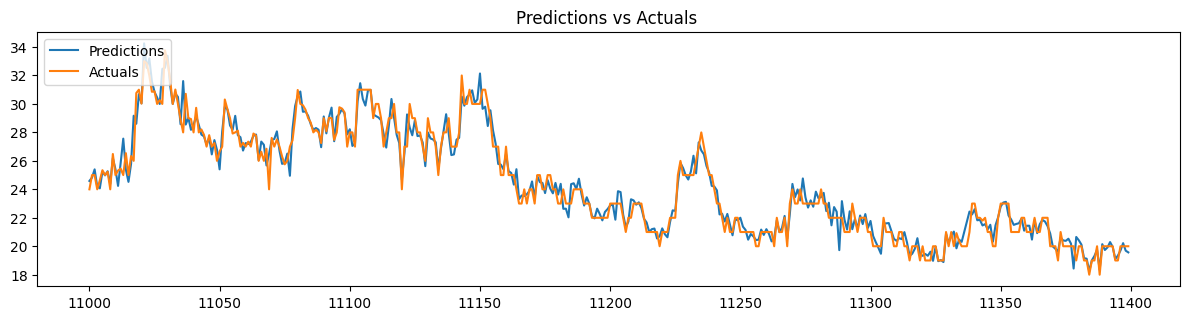

MAE: 0.5447245443095237
MSE: 2.8965626959605766
RMSE: 1.7019291101454774
[1.3860149383544922, 0.5842266082763672, 0.262481689453125, 1.2324237823486328, 0.701385498046875, 0.45699310302734375, 1.1352920532226562, 0.7116813659667969, 0.23493194580078125, 0.5190658569335938, 0.5617160797119141, 0.17142295837402344, 0.09228324890136719, 0.3057727813720703, 0.16638565063476562, 0.4952564239501953, 0.3263378143310547, 0.8394985198974609, 1.672250747680664, 0.5617275238037109, 0.029073715209960938, 0.18365478515625, 0.15263748168945312, 0.2930774688720703, 1.3742218017578125, 0.6243572235107422, 0.19414901733398438, 0.07419013977050781, 0.04453277587890625, 0.5423030853271484, 0.09597206115722656, 0.20349502563476562, 0.24738311767578125, 0.04931068420410156, 0.6676521301269531, 0.08579444885253906, 0.16455078125, 0.19808578491210938, 0.07981345420410157, 0.09782028198242188, 0.3380889892578125, 0.23071318451367162, 1.1290198347392568, 1.4660205841064453, 0.10311317443847656, 0.2662391662597

In [ ]:
#Evaluating model with original data
dfo,listLSTMO=plot_predictions(modelLSTM, X4_test, y4_test)

In [ ]:
dfo

Predictions    Actuals
0        17.386015  16.000000
1        16.415773  17.000000
2        16.262482  16.000000
3        16.232424  15.000000
4        15.298615  16.000000
...            ...        ...
25835    13.750675  13.611272
25836    13.385815  13.011815
25837    12.786360  13.011815
25838    12.613674  12.429439
25839    12.490837  12.269923

[25840 rows x 2 columns]

#Pickling the model

In [ ]:
import pickle
pickle.dump(modelLSTM,open('modelLSTM.pkl','wb'))

In [ ]:
from google.colab import files

files.download('modelLSTM.pkl')

In [ ]:
# #loading your model
# import pickle
# modelLSTM  =pickle.load(open('modeLLSTM.pkl','rb'))

**SecondTry**

In [ ]:
modelLSTM.fit(X4_train, y4_train, validation_data=(X4_test,y4_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[c1,early_stopping])

Epoch 1/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.3337 - root_mean_squared_error: 1.4665

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3336 - root_mean_squared_error: 1.4661 - val_loss: 0.5338 - val_root_mean_squared_error: 1.6918
Epoch 2/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3320 - root_mean_squared_error: 1.4643 - val_loss: 0.5344 - val_root_mean_squared_error: 1.6882
Epoch 3/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.3305 - root_mean_squared_error: 1.4585

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3305 - root_mean_squared_error: 1.4581 - val_loss: 0.5321 - val_root_mean_squared_error: 1.6836
Epoch 4/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.3302 - root_mean_squared_error: 1.4546

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3300 - root_mean_squared_error: 1.4529 - val_loss: 0.5293 - val_root_mean_squared_error: 1.6753
Epoch 5/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.3281 - root_mean_squared_error: 1.4494

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3280 - root_mean_squared_error: 1.4479 - val_loss: 0.5280 - val_root_mean_squared_error: 1.6698
Epoch 6/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3265 - root_mean_squared_error: 1.4457 - val_loss: 0.5286 - val_root_mean_squared_error: 1.6675
Epoch 7/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.3248 - root_mean_squared_error: 1.4398

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3247 - root_mean_squared_error: 1.4390 - val_loss: 0.5250 - val_root_mean_squared_error: 1.6616
Epoch 8/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3231 - root_mean_squared_error: 1.4357 - val_loss: 0.5350 - val_root_mean_squared_error: 1.6587
Epoch 9/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3214 - root_mean_squared_error: 1.4339 - val_loss: 0.5302 - val_root_mean_squared_error: 1.6577
Epoch 10/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.3202 - root_mean_squared_error: 1.4287

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3203 - root_mean_squared_error: 1.4278 - val_loss: 0.5227 - val_root_mean_squared_error: 1.6475
Epoch 11/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3189 - root_mean_squared_error: 1.4236 - val_loss: 0.5243 - val_root_mean_squared_error: 1.6453
Epoch 12/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.3183 - root_mean_squared_error: 1.4221

2423/2423 [==============================] - 25s 10ms/step - loss: 0.3181 - root_mean_squared_error: 1.4202 - val_loss: 0.5190 - val_root_mean_squared_error: 1.6375
Epoch 13/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.3163 - root_mean_squared_error: 1.4166

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3162 - root_mean_squared_error: 1.4162 - val_loss: 0.5165 - val_root_mean_squared_error: 1.6327
Epoch 14/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.3153 - root_mean_squared_error: 1.4135

2423/2423 [==============================] - 24s 10ms/step - loss: 0.3154 - root_mean_squared_error: 1.4130 - val_loss: 0.5164 - val_root_mean_squared_error: 1.6291
Epoch 15/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3145 - root_mean_squared_error: 1.4096 - val_loss: 0.5174 - val_root_mean_squared_error: 1.6264
Epoch 16/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3130 - root_mean_squared_error: 1.4047 - val_loss: 0.5180 - val_root_mean_squared_error: 1.6255
Epoch 17/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.3117 - root_mean_squared_error: 1.4028 - val_loss: 0.5334 - val_root_mean_squared_error: 1.6200


In [ ]:
import joblib

# Load the saved model
modelLSTM = joblib.load('modelLSTM1.pkl')

808/808 [==============================] - 3s 3ms/step


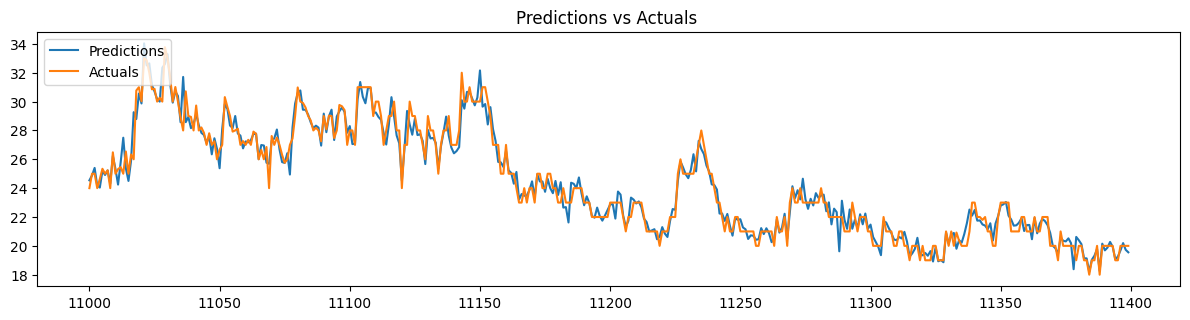

MAE: 0.4969933019394811
MSE: 2.4354268343590504
RMSE: 1.5605854139902278
[1.0890789031982422, 0.7286624908447266, 0.06703376770019531, 1.2293338775634766, 0.7337265014648438, 0.42900943756103516, 1.171844482421875, 0.6905317306518555, 0.20448017120361328, 0.5042028427124023, 0.6263952255249023, 0.23442935943603516, 0.0697174072265625, 0.2785615921020508, 0.1424722671508789, 0.4060325622558594, 0.3251609802246094, 0.9154453277587891, 1.7007503509521484, 0.5039730072021484, 0.06142425537109375, 0.16121387481689453, 0.14977741241455078, 0.31000232696533203, 1.3985977172851562, 0.5614185333251953, 0.16520309448242188, 0.06105232238769531, 0.030714035034179688, 0.5015697479248047, 0.10171222686767578, 0.2913856506347656, 0.23703765869140625, 0.051242828369140625, 0.6416339874267578, 0.06926918029785156, 0.18304157257080078, 0.22188568115234375, 0.007295105510253919, 0.17782211303710938, 0.37326717376708984, 0.32205611053906225, 0.8004828474345693, 1.3740978240966797, 0.08909988403320312, 0.

In [ ]:
dfo1,listLSTMO1=plot_predictions(modelLSTM, X4_test, y4_test)

In [ ]:
dfo1

Predictions    Actuals
0        17.089079  16.000000
1        16.271338  17.000000
2        16.067034  16.000000
3        16.229334  15.000000
4        15.266273  16.000000
...            ...        ...
25835    13.688138  13.611272
25836    13.251595  13.011815
25837    12.597777  13.011815
25838    12.620849  12.429439
25839    12.442046  12.269923

[25840 rows x 2 columns]

In [ ]:
pickle.dump(modelLSTM,open('modelLSTM1.pkl','wb'))

**Third Try**

In [ ]:
modelLSTM.fit(X4_train, y4_train, validation_data=(X4_test,y4_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[c1,early_stopping])

Epoch 1/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.2803 - root_mean_squared_error: 1.3165 - val_loss: 0.4885 - val_root_mean_squared_error: 1.5147
Epoch 2/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.2797 - root_mean_squared_error: 1.3170

2423/2423 [==============================] - 25s 10ms/step - loss: 0.2796 - root_mean_squared_error: 1.3152 - val_loss: 0.4826 - val_root_mean_squared_error: 1.5089
Epoch 3/200
2423/2423 [==============================] - 18s 7ms/step - loss: 0.2787 - root_mean_squared_error: 1.3125 - val_loss: 0.4833 - val_root_mean_squared_error: 1.5082
Epoch 4/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.2778 - root_mean_squared_error: 1.3109

2423/2423 [==============================] - 25s 10ms/step - loss: 0.2779 - root_mean_squared_error: 1.3107 - val_loss: 0.4822 - val_root_mean_squared_error: 1.5053
Epoch 5/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.2780 - root_mean_squared_error: 1.3084 - val_loss: 0.4832 - val_root_mean_squared_error: 1.5019
Epoch 6/200
2423/2423 [==============================] - 18s 7ms/step - loss: 0.2769 - root_mean_squared_error: 1.3073 - val_loss: 0.4827 - val_root_mean_squared_error: 1.5018
Epoch 7/200
2423/2423 [==============================] - 18s 7ms/step - loss: 0.2768 - root_mean_squared_error: 1.3051 - val_loss: 0.4851 - val_root_mean_squared_error: 1.5014


808/808 [==============================] - 2s 3ms/step


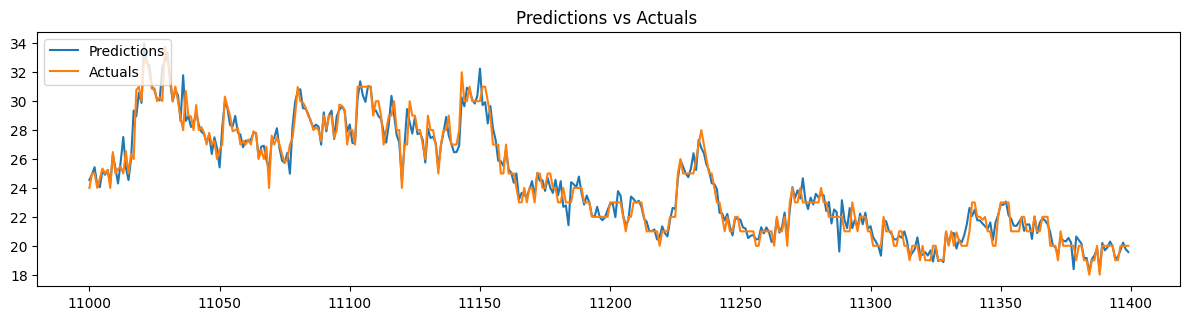

MAE: 0.4851477401252255
MSE: 2.2541596086704323
RMSE: 1.5013858959875812
[0.9401798248291016, 0.7819023132324219, 0.0015773773193359375, 1.2575016021728516, 0.7381048202514648, 0.4371786117553711, 1.2093124389648438, 0.6652240753173828, 0.1709423065185547, 0.5127201080322266, 0.6453037261962891, 0.2315692901611328, 0.09010696411132812, 0.2548065185546875, 0.13576316833496094, 0.3233070373535156, 0.31210899353027344, 0.9326057434082031, 1.7511558532714844, 0.44574928283691406, 0.09980964660644531, 0.1266641616821289, 0.12723922729492188, 0.3041725158691406, 1.4282779693603516, 0.5141124725341797, 0.136505126953125, 0.03565406799316406, 0.040325164794921875, 0.5008392333984375, 0.09802055358886719, 0.3593311309814453, 0.22776031494140625, 0.06784820556640625, 0.6346035003662109, 0.07033538818359375, 0.18216705322265625, 0.22034835815429688, 0.024773147053222644, 0.24017906188964844, 0.388763427734375, 0.4191268045087888, 0.6112719557109365, 1.340963363647461, 0.0954132080078125, 0.240655

In [ ]:
dfo3,listLSTMO3=plot_predictions(modelLSTM, X4_test, y4_test)

In [ ]:
dfo3

Predictions    Actuals
0        16.940180  16.000000
1        16.218098  17.000000
2        15.998423  16.000000
3        16.257502  15.000000
4        15.261895  16.000000
...            ...        ...
25835    13.685866  13.611272
25836    13.197357  13.011815
25837    12.536032  13.011815
25838    12.650712  12.429439
25839    12.426914  12.269923

[25840 rows x 2 columns]

In [ ]:
pickle.dump(modelLSTM,open('modelLSTM3.pkl','wb'))

In [ ]:

files.download('modelLSTM3.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**try 5**

In [ ]:
modelLSTM.fit(X4_train, y4_train, validation_data=(X4_test,y4_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[c1,early_stopping])

Epoch 1/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.2764 - root_mean_squared_error: 1.3047

2423/2423 [==============================] - 25s 10ms/step - loss: 0.2763 - root_mean_squared_error: 1.3033 - val_loss: 0.4820 - val_root_mean_squared_error: 1.4958
Epoch 2/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.2755 - root_mean_squared_error: 1.3023

2423/2423 [==============================] - 25s 10ms/step - loss: 0.2754 - root_mean_squared_error: 1.3020 - val_loss: 0.4790 - val_root_mean_squared_error: 1.4943
Epoch 3/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.2747 - root_mean_squared_error: 1.2995 - val_loss: 0.4792 - val_root_mean_squared_error: 1.4910
Epoch 4/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.2743 - root_mean_squared_error: 1.2990 - val_loss: 0.4806 - val_root_mean_squared_error: 1.4913
Epoch 5/200
2417/2423 [============================>.] - ETA: 0s - loss: 0.2734 - root_mean_squared_error: 1.2967

2423/2423 [==============================] - 25s 10ms/step - loss: 0.2734 - root_mean_squared_error: 1.2958 - val_loss: 0.4785 - val_root_mean_squared_error: 1.4879
Epoch 6/200
2423/2423 [==============================] - ETA: 0s - loss: 0.2724 - root_mean_squared_error: 1.2938

2423/2423 [==============================] - 25s 10ms/step - loss: 0.2724 - root_mean_squared_error: 1.2938 - val_loss: 0.4766 - val_root_mean_squared_error: 1.4849
Epoch 7/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.2729 - root_mean_squared_error: 1.2927 - val_loss: 0.4770 - val_root_mean_squared_error: 1.4827
Epoch 8/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.2722 - root_mean_squared_error: 1.2916 - val_loss: 0.4829 - val_root_mean_squared_error: 1.4812
Epoch 9/200
2423/2423 [==============================] - 17s 7ms/step - loss: 0.2717 - root_mean_squared_error: 1.2895 - val_loss: 0.4911 - val_root_mean_squared_error: 1.4870


808/808 [==============================] - 2s 3ms/step


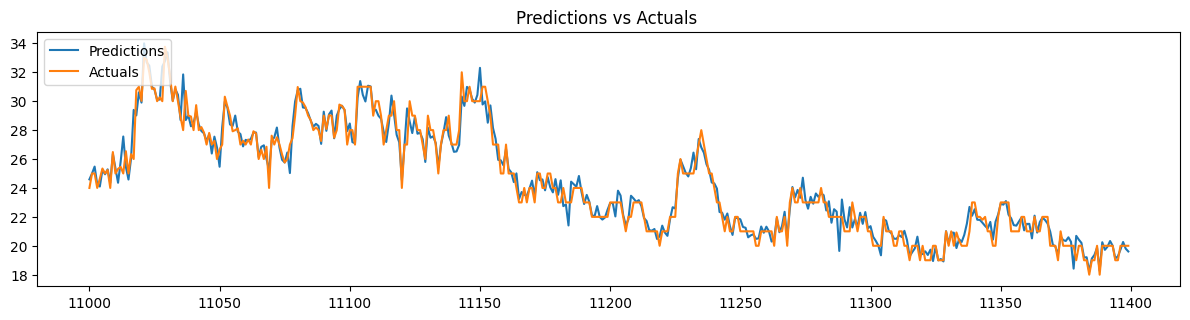

MAE: 0.49109694114206
MSE: 2.2110761856467596
RMSE: 1.4869687910802833
[0.9363384246826172, 0.7514781951904297, 0.021654129028320312, 1.3086681365966797, 0.6955432891845703, 0.4840068817138672, 1.2628402709960938, 0.6170454025268555, 0.11983299255371094, 0.5550460815429688, 0.6071434020996094, 0.18582916259765625, 0.13463592529296875, 0.21238422393798828, 0.17243194580078125, 0.2518634796142578, 0.26915931701660156, 0.8990745544433594, 1.801523208618164, 0.3954448699951172, 0.14495468139648438, 0.07637977600097656, 0.08078956604003906, 0.2623729705810547, 1.4778270721435547, 0.46067047119140625, 0.09026527404785156, 0.010828018188476562, 0.08284187316894531, 0.5393123626708984, 0.05379962921142578, 0.4249305725097656, 0.18538665771484375, 0.11481857299804688, 0.6746597290039062, 0.11551666259765625, 0.13737773895263672, 0.17743873596191406, 0.0063919759326172, 0.2962913513183594, 0.3596019744873047, 0.4890273172041013, 0.5887518904033193, 1.3709239959716797, 0.1341552734375, 0.19300937

In [ ]:
dfo4,listLSTMO4=plot_predictions(modelLSTM, X4_test, y4_test)

In [ ]:
dfo4

Predictions    Actuals
0        16.936338  16.000000
1        16.248522  17.000000
2        16.021654  16.000000
3        16.308668  15.000000
4        15.304457  16.000000
...            ...        ...
25835    13.734138  13.611272
25836    13.229786  13.011815
25837    12.568911  13.011815
25838    12.708369  12.429439
25839    12.468044  12.269923

[25840 rows x 2 columns]

In [ ]:
pickle.dump(modelLSTM,open('modelLSTM4.pkl','wb'))

In [ ]:

files.download('modelLSTM4.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Compare your models

In [ ]:
def compare(lista,listl):
  Lc=[]
  for i in range(len(listl)):
      if lista[i] > listl[i]:
        Lc.append("a")
      else:
        Lc.append("b")  
  print(sum(lista)/len(lista))  
  print(sum(listl)/len(listl))    
  print(Lc)
  C1=Lc.count("a")
  C2=Lc.count("b")
  print(C1)
  print(C2)  
  if(C1>C2) :
    return("model 2 is better")
  else:
    return("model 1 is better")  

In [115]:
import joblib

# Load the saved model
modelLSTM = joblib.load('modelLSTM.pkl')

808/808 [==============================] - 2s 2ms/step


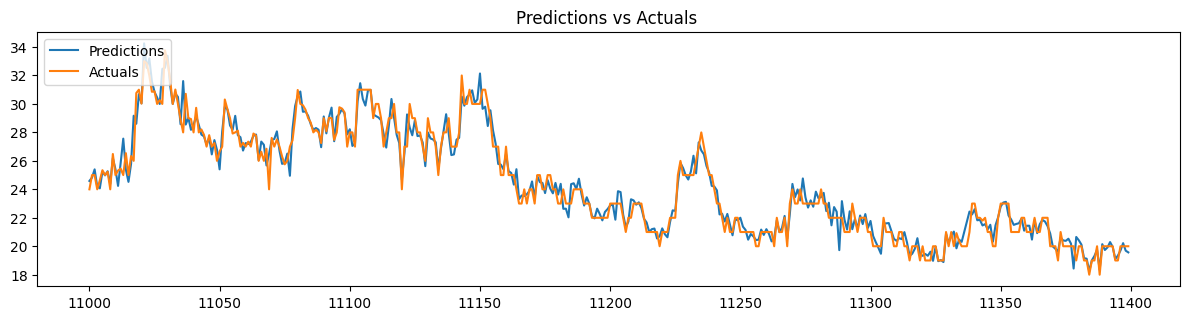

MAE: 0.5447245443095237
MSE: 2.8965626959605766
RMSE: 1.7019291101454774
List of differences between predicted and actual values
[1.3860149383544922, 0.5842266082763672, 0.262481689453125, 1.2324237823486328, 0.701385498046875, 0.45699310302734375, 1.1352920532226562, 0.7116813659667969, 0.23493194580078125, 0.5190658569335938, 0.5617160797119141, 0.17142295837402344, 0.09228324890136719, 0.3057727813720703, 0.16638565063476562, 0.4952564239501953, 0.3263378143310547, 0.8394985198974609, 1.672250747680664, 0.5617275238037109, 0.029073715209960938, 0.18365478515625, 0.15263748168945312, 0.2930774688720703, 1.3742218017578125, 0.6243572235107422, 0.19414901733398438, 0.07419013977050781, 0.04453277587890625, 0.5423030853271484, 0.09597206115722656, 0.20349502563476562, 0.24738311767578125, 0.04931068420410156, 0.6676521301269531, 0.08579444885253906, 0.16455078125, 0.19808578491210938, 0.07981345420410157, 0.09782028198242188, 0.3380889892578125, 0.23071318451367162, 1.1290198347392568, 

In [120]:
dfo,listLSTMO=plot_predictions(modelLSTM, X4_test, y4_test)

In [121]:
modelLSTM1 = joblib.load('modelLSTM1.pkl')

808/808 [==============================] - 3s 3ms/step


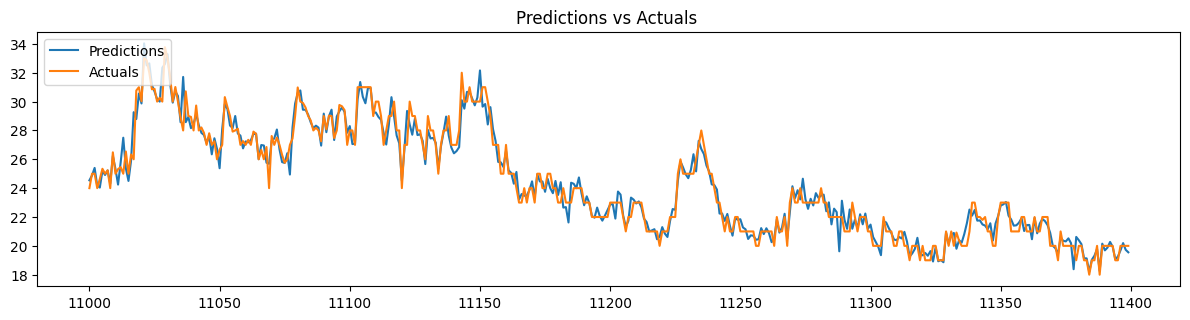

MAE: 0.4969933019394811
MSE: 2.4354268343590504
RMSE: 1.5605854139902278
List of differences between predicted and actual values
[1.0890789031982422, 0.7286624908447266, 0.06703376770019531, 1.2293338775634766, 0.7337265014648438, 0.42900943756103516, 1.171844482421875, 0.6905317306518555, 0.20448017120361328, 0.5042028427124023, 0.6263952255249023, 0.23442935943603516, 0.0697174072265625, 0.2785615921020508, 0.1424722671508789, 0.4060325622558594, 0.3251609802246094, 0.9154453277587891, 1.7007503509521484, 0.5039730072021484, 0.06142425537109375, 0.16121387481689453, 0.14977741241455078, 0.31000232696533203, 1.3985977172851562, 0.5614185333251953, 0.16520309448242188, 0.06105232238769531, 0.030714035034179688, 0.5015697479248047, 0.10171222686767578, 0.2913856506347656, 0.23703765869140625, 0.051242828369140625, 0.6416339874267578, 0.06926918029785156, 0.18304157257080078, 0.22188568115234375, 0.007295105510253919, 0.17782211303710938, 0.37326717376708984, 0.32205611053906225, 0.80048

In [122]:
dfo1,listLSTMO1=plot_predictions(modelLSTM1, X4_test, y4_test)

In [123]:
modelLSTM2 = joblib.load('modelLSTM2.pkl')

808/808 [==============================] - 3s 2ms/step


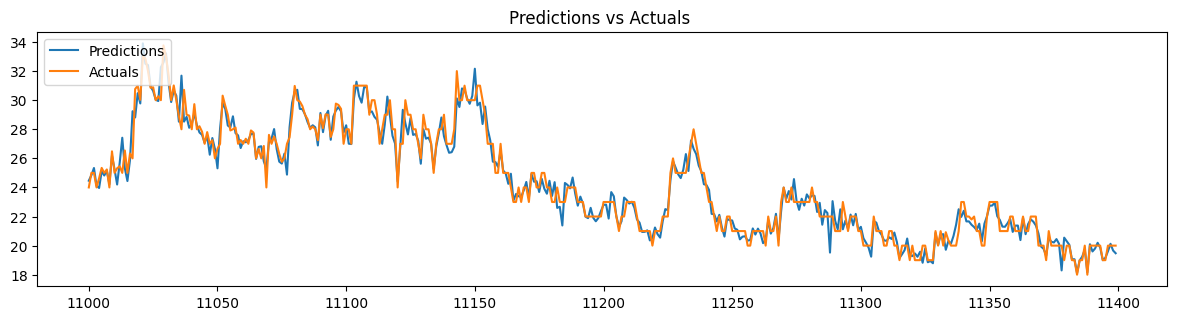

MAE: 0.4900833020665489
MSE: 2.2931132138928088
RMSE: 1.5143028805007301
List of differences between predicted and actual values
[0.8929119110107422, 0.8587779998779297, 0.07124805450439453, 1.1610298156738281, 0.8260288238525391, 0.3514881134033203, 1.117757797241211, 0.7509164810180664, 0.2613945007324219, 0.42949771881103516, 0.7251672744750977, 0.3181581497192383, 0.0019254684448242188, 0.35075855255126953, 0.05298805236816406, 0.43123626708984375, 0.39984130859375, 1.0135526657104492, 1.6508769989013672, 0.5497970581054688, 0.001956939697265625, 0.2214221954345703, 0.2170877456665039, 0.3884620666503906, 1.3376083374023438, 0.6084918975830078, 0.2280902862548828, 0.1276721954345703, 0.05022239685058594, 0.4131889343261719, 0.1852865219116211, 0.2557029724121094, 0.3139228820800781, 0.020599365234375, 0.5539531707763672, 0.012726783752441406, 0.2641162872314453, 0.30126190185546875, 0.09443524116943358, 0.14415550231933594, 0.464813232421875, 0.31363325897656225, 0.5785056135478506

In [124]:
dfo2,listLSTMO2=plot_predictions(modelLSTM2, X4_test, y4_test)

In [125]:
modelLSTM3 = joblib.load('modelLSTM3.pkl')

808/808 [==============================] - 3s 2ms/step


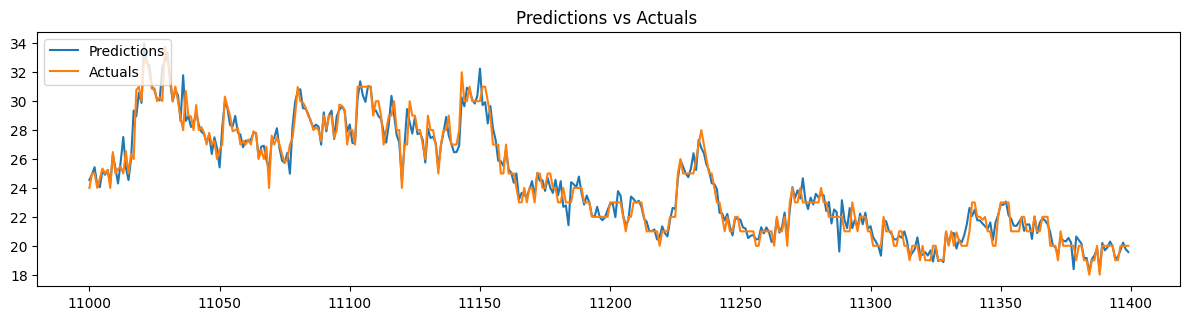

MAE: 0.4851477401252255
MSE: 2.2541596086704323
RMSE: 1.5013858959875812
List of differences between predicted and actual values
[0.9401798248291016, 0.7819023132324219, 0.0015773773193359375, 1.2575016021728516, 0.7381048202514648, 0.4371786117553711, 1.2093124389648438, 0.6652240753173828, 0.1709423065185547, 0.5127201080322266, 0.6453037261962891, 0.2315692901611328, 0.09010696411132812, 0.2548065185546875, 0.13576316833496094, 0.3233070373535156, 0.31210899353027344, 0.9326057434082031, 1.7511558532714844, 0.44574928283691406, 0.09980964660644531, 0.1266641616821289, 0.12723922729492188, 0.3041725158691406, 1.4282779693603516, 0.5141124725341797, 0.136505126953125, 0.03565406799316406, 0.040325164794921875, 0.5008392333984375, 0.09802055358886719, 0.3593311309814453, 0.22776031494140625, 0.06784820556640625, 0.6346035003662109, 0.07033538818359375, 0.18216705322265625, 0.22034835815429688, 0.024773147053222644, 0.24017906188964844, 0.388763427734375, 0.4191268045087888, 0.611271955

In [126]:
dfo3,listLSTMO3=plot_predictions(modelLSTM3, X4_test, y4_test)

In [127]:
modelLSTM4 = joblib.load('modelLSTM4.pkl')

808/808 [==============================] - 3s 2ms/step


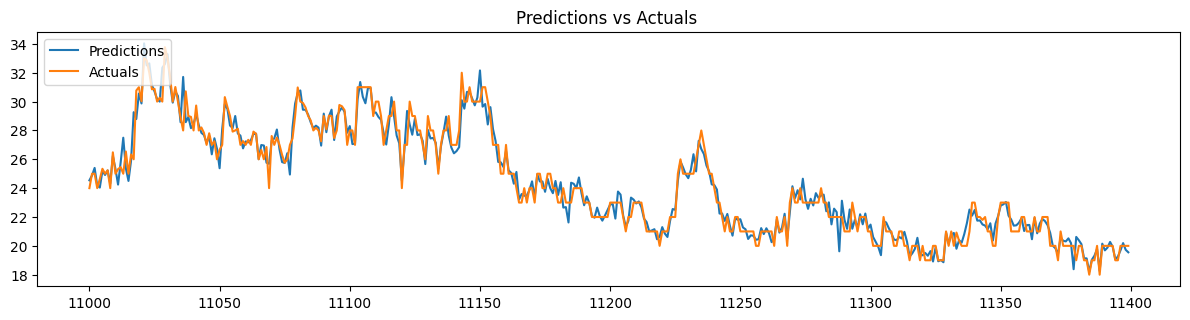

MAE: 0.4969933019394811
MSE: 2.4354268343590504
RMSE: 1.5605854139902278
List of differences between predicted and actual values
[1.0890789031982422, 0.7286624908447266, 0.06703376770019531, 1.2293338775634766, 0.7337265014648438, 0.42900943756103516, 1.171844482421875, 0.6905317306518555, 0.20448017120361328, 0.5042028427124023, 0.6263952255249023, 0.23442935943603516, 0.0697174072265625, 0.2785615921020508, 0.1424722671508789, 0.4060325622558594, 0.3251609802246094, 0.9154453277587891, 1.7007503509521484, 0.5039730072021484, 0.06142425537109375, 0.16121387481689453, 0.14977741241455078, 0.31000232696533203, 1.3985977172851562, 0.5614185333251953, 0.16520309448242188, 0.06105232238769531, 0.030714035034179688, 0.5015697479248047, 0.10171222686767578, 0.2913856506347656, 0.23703765869140625, 0.051242828369140625, 0.6416339874267578, 0.06926918029785156, 0.18304157257080078, 0.22188568115234375, 0.007295105510253919, 0.17782211303710938, 0.37326717376708984, 0.32205611053906225, 0.80048

In [129]:
dfo4,listLSTMO4=plot_predictions(modelLSTM4, X4_test, y4_test)

In [135]:
compare(listLSTMO1,listLSTMO)

0.4969933019394815
0.5447245443095236
['b', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'b', '

'model 1 is better'

In [136]:
compare(listLSTMO2,listLSTMO1)

0.49008330206655026
0.4969933019394815
['b', 'a', 'a', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 

'model 2 is better'

In [137]:
compare(listLSTMO3,listLSTMO1)

0.485147740125225
0.4969933019394815
['b', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'b

'model 1 is better'

In [138]:
compare(listLSTMO4,listLSTMO3)

0.4969933019394815
0.485147740125225
['a', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'a

'model 2 is better'